In [ ]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from scipy import signal
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import models, regularizers
from keras.utils.np_utils import to_categorical
import skimage.draw
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

chemin = "drive/MyDrive/BME/Artificial_Intelligence_in_Data_Science/class_11/"

In [ ]:
def make_labels(directory, data=[], y_hat=[], label=0):
    for root, dirs, files in os.walk(directory):
        for file in files:
            img = matplotlib.image.imread(directory+file)
            data.append(img)
        y_hat = [label] * len(data)
    return np.array(data), np.array(y_hat)

In [ ]:
# https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
circles, y_circles = [], []
circles, y_circles = make_labels(chemin+'shapes/circles/', data=circles, y_hat=y_circles)

squares, y_squares = [], []
squares, y_squares = make_labels(chemin+'shapes/squares/', data=squares, y_hat=y_squares, label=1)

triangles, y_triangles = [], []
triangles, y_triangles = make_labels(chemin+'shapes/triangles/', data=triangles, y_hat=y_triangles, label=2)

In [ ]:
print(circles.shape, squares.shape, triangles.shape)
print(y_circles.shape, y_squares.shape, y_triangles.shape)

In [ ]:
X = np.vstack((circles, squares, triangles))
y = np.hstack((y_circles, y_squares, y_triangles)).reshape(-1, 1)
y_cat = to_categorical(y)

In [ ]:
i = 3
plt.imshow(circles[i])
plt.show()
plt.imshow(triangles[i])
plt.show()
plt.imshow(squares[i])
plt.show()

In [ ]:
img = triangles[3]
rows, cols, ch = img.shape 

### Rotation
Rotation around center `(cx,cy)` by angle `deg` degrees, and scale the image by `f`

`cv2.getRotationMatrix2D( (cx,cy), deg, f )`

In [ ]:
rot_mat = cv2.getRotationMatrix2D( (14,14), 70, 0.5 );

In [ ]:
rot_mat

In [ ]:
timg = cv2.warpAffine( img, rot_mat, (cols, rows), borderValue=(1.,1.,1.) )

In [ ]:
plt.imshow(timg)

### Affine transformation
Transform a triangle to an other triangle. `pts1` is transformed to `pts2`

In [ ]:
pts1 = np.float32([[5, 5], 
                   [20, 5],  
                   [5, 20]]) 
  
pts2 = np.float32([[1, 10], 
                   [20, 5],  
                   [10, 25]]) 
  
M = cv2.getAffineTransform(pts1, pts2) 
dst = cv2.warpAffine(img, M, (cols, rows), borderValue=(1.,1.,1.)) 

In [ ]:
plt.imshow(dst)

### Convolution

In [ ]:
kernel = np.array([[0,0.1,0],[0.1,0.6,0.1],[0,0.1,0]])
dst = np.clip(cv2.filter2D(img,-1,kernel),0,1)
plt.imshow(dst)

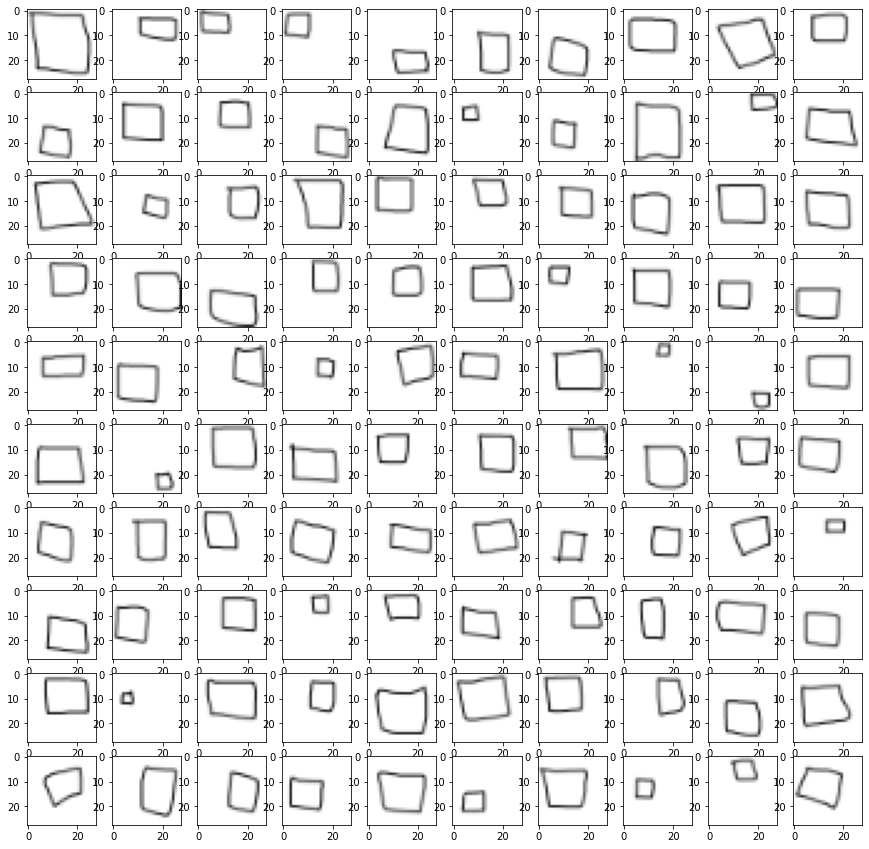

In [17]:
plt.subplots(10,10,figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(squares[i])

## TASK
Using the single training images above (`circles[3], squares[3], trinagles[3]`), create a few hundred new training images using the transformations above. Use it as a training set for a convolutional neural network and test it on the original data set. Accuracy above 40-50% is nice! Hints:
 * I used 4 layers of convolutions and max pooling after each second
 * The dense hidden layer can be large ~100 nodes but always use regulariaztion overfitting in this case is suicide!
 * I have used only affine transformation on the rotated image, but you can try other things
 * I have used a weak image enhancement with `[[0,-e,0],[-e,1+4e,-e],[0,-e,0]]` matrix, with `e` around 0.25
 * After all transformations, I have rescaled the images to the range $[0:1]$
 * I have used normally distributed random numbers on all possible parameters of the affine transformations, see example below for possible problems.
 * Advice: plot the created images (see the command above) to see if they get similarly distorted to the ones above

In [18]:
chosen_tri = triangles[3]
chosen_square = squares[11]
chosen_cir = circles[25]

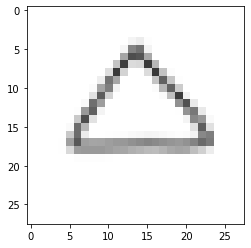

In [19]:
plt.imshow(chosen_tri)

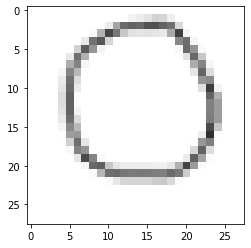

In [20]:
plt.imshow(chosen_cir)

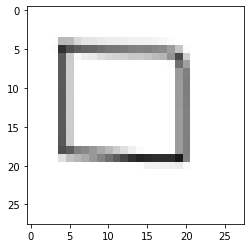

In [21]:
plt.imshow(chosen_square)

In [22]:
def rotation(img,center=None,angle=None, f=None):

  if center is None :
    center_1 = np.random.randint(int(img.shape[0]/2-img.shape[0]/6),int(img.shape[0]/2+img.shape[0]/6))
    center_2 = np.random.randint(int(img.shape[0]/2-img.shape[1]/6),int(img.shape[1]/2+img.shape[1]/6))
    center = [center_1,center_2]
  if angle is None :
    max_angle = 360
    angle = np.random.randint(max_angle)
  if f is None :
    min_scale = 40
    max_scale = 140
    f = np.random.randint(min_scale,max_scale)/100

  rot_mat = cv2.getRotationMatrix2D( (center[0],center[1]), angle, f)
  new_img = cv2.warpAffine( img, rot_mat, (img.shape[0], img.shape[1]), borderValue=(1.,1.,1.) )
  return new_img

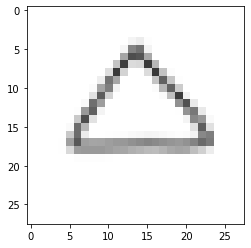

In [23]:
plt.imshow(chosen_tri)

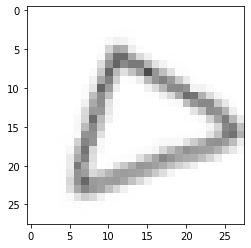

In [24]:
plt.imshow(rotation(chosen_tri))

In [25]:
def affine_transform(img, pts1=None,pts2=None):

  choose_option = np.random.randint(5)

  if pts1 is None and choose_option==0 :
    pts1 = np.float32([[5, 5], 
                    [20, 5],  
                    [5, 20]]) 
  if pts2 is None and choose_option==0 :
    pts2 = np.float32([[3, 10], 
                    [17, 8],  
                    [3, 23]])
    
  if pts1 is None and choose_option==1:
    pts1 = np.float32([[5, 5], 
                    [20, 5],  
                    [5, 23]]) 
  if pts2 is None and choose_option==1:
    pts2 = np.float32([[5, 3], 
                    [22, 3],  
                    [7, 18]]) 
    
  if pts1 is None and choose_option==2:
    pts1 = np.float32([[5, 5], 
                    [20, 5],  
                    [5, 20]]) 
  if pts2 is None and choose_option==2 :
    pts2 = np.float32([[5, 8], 
                    [18, 9],  
                    [7, 15]])
    
  if pts1 is None and choose_option==3:
    pts1 = np.float32([[5, 5], 
                    [20, 5],  
                    [5, 20]]) 
  if pts2 is None and choose_option==3 :
    pts2 = np.float32([[5, 10], 
                    [18, 10],  
                    [7, 19]])
  
  if pts1 is None and choose_option==4:
    pts1 = np.float32([[5, 5], 
                    [20, 5],  
                    [5, 20]]) 
  if pts2 is None and choose_option==4 :
    pts2 = np.float32([[9, 2], 
                    [13, 17],  
                    [13, 23]]) 

  
  M = cv2.getAffineTransform(pts1, pts2)
  new_img = cv2.warpAffine(img, M, (img.shape[0], img.shape[1]), borderValue=(1.,1.,1.)) 

  return new_img

def convulation(img,kernel = None):
  if kernel is None :
    kernel = np.array([[0,0.1,0],[0.1,0.6,0.1],[0,0.1,0]])
  new_img = np.clip(cv2.filter2D(img,-1,kernel),0,1)
  return new_img

In [26]:
def inverse_img(img):
  rows, cols = img.shape[:2]
 
  # Define the 3 pairs of corresponding points 
  input_pts = np.float32([[0,0], [cols-1,0], [0,rows-1]])
  output_pts = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
  
  # Calculate the transformation matrix using cv2.getAffineTransform()
  M= cv2.getAffineTransform(input_pts , output_pts)

  #M = cv2.getAffineTransform(pts1, pts2)
  new_img = cv2.warpAffine(img, M, (img.shape[0], img.shape[1]), borderValue=(1.,1.,1.)) 
  return new_img

In [27]:
pts1

array([[ 5.,  5.],
       [20.,  5.],
       [ 5., 20.]], dtype=float32)

In [28]:
pts2

array([[ 1., 10.],
       [20.,  5.],
       [10., 25.]], dtype=float32)

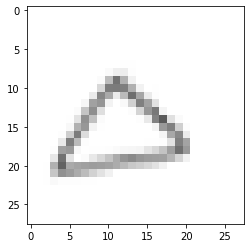

In [29]:
plt.imshow(affine_transform(chosen_tri))

In [30]:
def data_augmentation(img_to_augm, nb_test):
  res = np.zeros((nb_test,img_to_augm.shape[0],img_to_augm.shape[1],img_to_augm.shape[2]))


  for i in range(nb_test):
      
    res[i] = rotation(img_to_augm)

    if np.random.randint(3)<1:
      img = res[i]
      res[i] = affine_transform(img)

    if np.random.randint(2)<1:
      img = res[i]
      res[i] = inverse_img(img)

    if np.random.randint(3)<2:
      img = res[i]
      res[i] = convulation(img)
      
  return res   

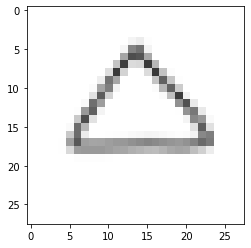

In [31]:
plt.imshow(chosen_tri)

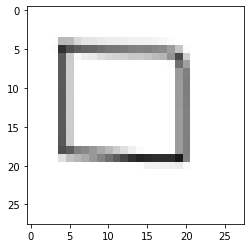

In [32]:
plt.imshow(chosen_square)

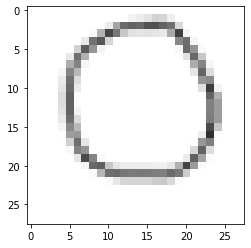

In [33]:

plt.imshow(chosen_cir)

In [34]:
img_to_augm = chosen_tri
res_tris = data_augmentation(img_to_augm, 3000)
img_to_augm = chosen_square
res_squares = data_augmentation(img_to_augm, 3000)
img_to_augm = chosen_cir
res_circles = data_augmentation(img_to_augm, 3000)

In [ ]:
plt.subplots(10,10,figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(res_tris[i])

In [ ]:
plt.subplots(10,10,figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(res_squares[i])

In [ ]:
plt.subplots(10,10,figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(res_circles[i])

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 100
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(rows, cols, ch)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(3, activation='softmax'),
])

In [ ]:
y_circles

In [ ]:
X = np.vstack((res_tris, res_squares, res_circles))
y = np.hstack((np.ones(len(res_tris))*2, np.ones(len(res_squares)), np.ones(len(res_circles))*0)).reshape(-1, 1)
y_cat = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.33, random_state=42)

In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size=20, validation_split=0.2, callbacks=[ monitor_val_acc])

Epoch 1/50
242/242 [==============================] - 3s 9ms/step - loss: 1.1293 - accuracy: 0.3327 - val_loss: 1.0949 - val_accuracy: 0.3657
Epoch 2/50
242/242 [==============================] - 2s 9ms/step - loss: 1.0929 - accuracy: 0.3837 - val_loss: 1.0817 - val_accuracy: 0.3665
Epoch 3/50
242/242 [==============================] - 2s 9ms/step - loss: 1.0695 - accuracy: 0.4088 - val_loss: 1.0476 - val_accuracy: 0.4279
Epoch 4/50
242/242 [==============================] - 2s 9ms/step - loss: 1.0452 - accuracy: 0.4322 - val_loss: 1.0467 - val_accuracy: 0.4204
Epoch 5/50
242/242 [==============================] - 2s 9ms/step - loss: 1.0356 - accuracy: 0.4351 - val_loss: 1.0204 - val_accuracy: 0.4403
Epoch 6/50
242/242 [==============================] - 2s 9ms/step - loss: 1.0222 - accuracy: 0.4515 - val_loss: 1.0403 - val_accuracy: 0.4196
Epoch 7/50
242/242 [==============================] - 2s 9ms/step - loss: 1.0133 - accuracy: 0.4534 - val_loss: 1.0130 - val_accuracy: 0.4494
Epoch 

In [ ]:
np.mean(np.argmax(model.predict(res_circles), axis = 1) == 0)

In [ ]:
np.mean(np.argmax(model.predict(res_squares), axis = 1) == 1)

In [ ]:
np.mean(np.argmax(model.predict(res_tris), axis = 1) == 2)

In [ ]:
model.evaluate(X_test, y_test)

### Normally distributed integer numbers
General task: modify a number with an integer using normal distribution

Solution: generate normally distributed float numbers and convert it to integer. Problem is that both `int(0.5)=0` and `int(-0.5)=0`. Thus make sure that the float numbers are always positive. In the second example below, you can see the high peak at 0 which is artificial.

In [ ]:
plt.hist(np.random.normal(4.5,1.5,size=1000).astype(int),bins=np.arange(10)-0.5)

In [ ]:
plt.hist(np.random.normal(1.5,1.5,size=1000).astype(int),bins=np.arange(10)-4.5)

In [ ]:
int(-0.5)